In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random
import pylab as pl

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# scikit learning package
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
path = '/content/drive/My Drive/SEM-8-Documents/IOE/IOE-LAB/IOE-DataSet/Absenteeism_at_work_train.csv'
data_530 = pd.read_csv(path, decimal=",")

In [ ]:
#Data Cleaning:

In [ ]:
data_530.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               666 non-null    int64  
 1   Reason for absence               666 non-null    int64  
 2   Month of absence                 666 non-null    int64  
 3   Day of the week                  666 non-null    int64  
 4   Seasons                          666 non-null    int64  
 5   Transportation expense           666 non-null    int64  
 6   Distance from Residence to Work  666 non-null    int64  
 7   Service time                     666 non-null    int64  
 8   Age                              666 non-null    object 
 9   Work load Average/day            666 non-null    float64
 10  Hit target                       665 non-null    float64
 11  Disciplinary failure             666 non-null    int64  
 12  Education             

In [ ]:
data_530.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90.0,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98.0,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89.0,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68.0,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90.0,172,30,2


In [ ]:
# age column have junk values

data_530.Age = data_530.Age.replace("R", 0)

data_530['Age'] =data_530['Age'].astype(str).astype('int64')

# replacing rows with age 0
#data_530.Age = data_530.Age.replace(0, int(data_530['Age'].mean()))

data_530 = data_530[data_530['Age'] != 0]

In [ ]:
# Null values in dataset
data_530.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         1
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             2
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
# replace null values with respective column mean

data_530 =data_530.fillna(0)

In [ ]:
#type conversion
data_530['Age'] =data_530['Age'].astype('int64')

data_530.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,...,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,17.688253,19.459337,6.451807,3.893072,2.552711,222.650602,30.311747,12.694277,36.406627,272.605247,...,0.054217,1.246988,1.028614,0.584337,0.067771,0.686747,78.978916,171.868976,26.817771,6.756024
std,11.075530,8.352608,3.573081,1.425584,1.136369,66.660267,14.888751,4.355080,6.365941,42.851846,...,0.226616,0.618340,1.125903,0.493207,0.251542,1.169525,13.343456,5.938549,4.235338,12.685099
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,27.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [ ]:
# cross verify for null values
data_530.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
# adding new column named 'followUp_req' based on whether reason for absence required follow up or not
data_530['followUp_req'] = np.where(data_530['Reason for absence'] <= 21, 1, 0)

# add categorical target column as per project requirement

data_530['Absenteeism categories'] = np.where(data_530['Absenteeism time in hours'] == 0, "Group 0", 
                                              np.where(data_530['Absenteeism time in hours'] == 1, "Group 1",
                                                      np.where(data_530['Absenteeism time in hours'] == 2, "Group 2",
                                                              np.where(data_530['Absenteeism time in hours'] == 3, "Group 3",
                                                                      np.where((data_530['Absenteeism time in hours'] >= 4)&(data_530['Absenteeism time in hours'] <= 7), "Group 4",
                                                                               np.where(data_530['Absenteeism time in hours'] == 8, "Group 5",
                                                                                       np.where(data_530['Absenteeism time in hours'] >= 9, "Group 6",0))
                                                                              )))))

In [ ]:
# checking for Absenteeism categorie groups 
a= data_530['Absenteeism categories'].unique()
print(sorted(a))

['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6']


In [ ]:
# formatting to proper data type
data_530['Reason for absence'] = data_530['Reason for absence'].astype('category')
data_530['Month of absence'] = data_530['Month of absence'].astype('category')
data_530['Day of the week'] = data_530['Day of the week'].astype('category')
data_530['Seasons'] = data_530['Seasons'].astype('category')
data_530['Disciplinary failure'] = data_530['Disciplinary failure'].astype('category')
data_530['Education'] = data_530['Education'].astype('category')
data_530['Social drinker'] = data_530['Social drinker'].astype('category')
data_530['Social smoker'] = data_530['Social smoker'].astype('category')
data_530['Pet'] = data_530['Pet'].astype('category')
data_530['followUp_req'] = data_530['followUp_req'].astype('category')
data_530['Absenteeism categories'] = data_530['Absenteeism categories'].astype('category')
data_530.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 665
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               664 non-null    int64   
 1   Reason for absence               664 non-null    category
 2   Month of absence                 664 non-null    category
 3   Day of the week                  664 non-null    category
 4   Seasons                          664 non-null    category
 5   Transportation expense           664 non-null    int64   
 6   Distance from Residence to Work  664 non-null    int64   
 7   Service time                     664 non-null    int64   
 8   Age                              664 non-null    int64   
 9   Work load Average/day            664 non-null    float64 
 10  Hit target                       664 non-null    float64 
 11  Disciplinary failure             664 non-null    category
 12  Educatio

We can observe outliers in transportation expense


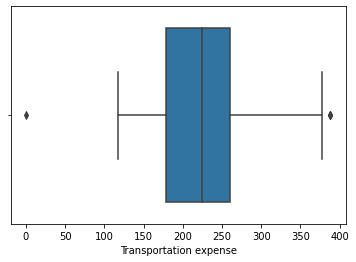

In [ ]:
#observe outliers in transportation expense
print('We can observe outliers in transportation expense')
sns.boxplot(data_530['Transportation expense'])

no outliers


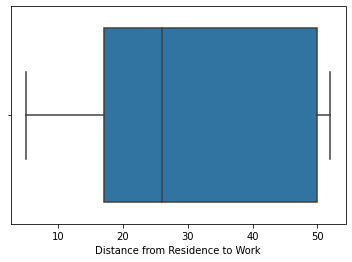

In [ ]:
sns.boxplot(data_530['Distance from Residence to Work'])
print('no outliers')

We can observe outliers in service time variable


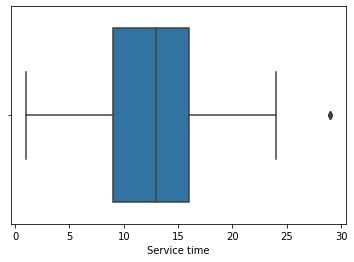

In [ ]:
sns.boxplot(data_530['Service time'])
print('We can observe outliers in service time variable')

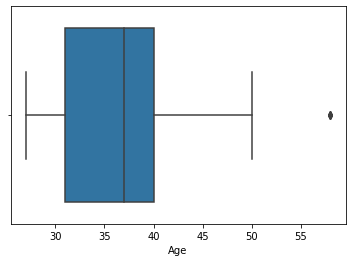

In [ ]:
sns.boxplot(data_530['Age'])

We can observe outliers in Work load Average/day


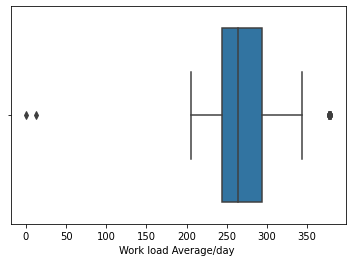

In [ ]:
sns.boxplot(data_530['Work load Average/day '])

print('We can observe outliers in Work load Average/day')

We can observe outlier in Hit target


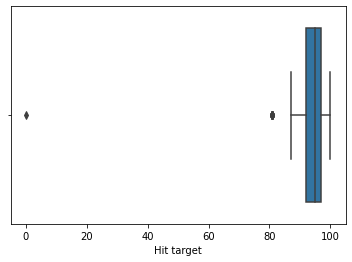

In [ ]:
sns.boxplot(data_530['Hit target'])
print('We can observe outlier in Hit target')

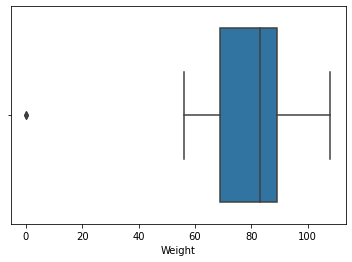

In [ ]:
sns.boxplot(data_530['Weight'])

We can observe outliers in Height variable


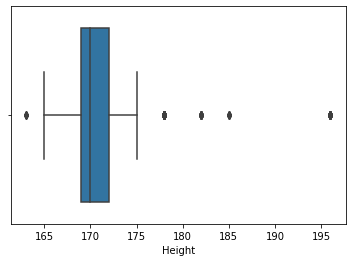

In [ ]:
sns.boxplot(data_530['Height'])
print('We can observe outliers in Height variable')

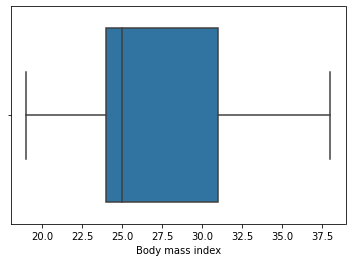

In [ ]:
sns.boxplot(data_530['Body mass index'])

In [ ]:
# store two datasets, one for continous and other categorical
dataset_continuous = data_530.drop('Absenteeism categories', axis=1)
dataset_categorical = data_530.drop('Absenteeism time in hours',axis=1)

print(dataset_continuous.shape)
print(dataset_categorical.shape)

(664, 22)
(664, 22)


In [ ]:
# write the taining data to file

dataset_continuous.to_csv('cleanDataset_continuousTarget.csv',index=False)
dataset_categorical.to_csv('cleanDataset_categoricalTarget.csv',index=False)

In [ ]:
# get the test dataset
test_path = '/content/drive/My Drive/SEM-8-Documents/IOE/IOE-LAB/IOE-DataSet/Absenteeism_at_work_test.csv'
mydata_test = pd.read_csv(test_path, decimal=",")

In [ ]:
# preprocess the test dataset
# adding new column named 'followUp_req' based on whether reason for absence required follow up or not
mydata_test['followUp_req'] = np.where(mydata_test['Reason for absence'] <= 21, 1, 0)

# add categorical target column as per project requirement

mydata_test['Absenteeism categories'] = np.where(mydata_test['Absenteeism time in hours'] == 0, "Group 0", 
                                              np.where(mydata_test['Absenteeism time in hours'] == 1, "Group 1",
                                                      np.where(mydata_test['Absenteeism time in hours'] == 2, "Group 2",
                                                              np.where(mydata_test['Absenteeism time in hours'] == 3, "Group 3",
                                                                      np.where((mydata_test['Absenteeism time in hours'] >= 4)&(mydata_test['Absenteeism time in hours'] <= 7), "Group 4",
                                                                               np.where(mydata_test['Absenteeism time in hours'] == 8, "Group 5",
                                                                                       np.where(mydata_test['Absenteeism time in hours'] >= 9, "Group 6",0))
                                                                              )))))

mydata_test['Reason for absence'] = mydata_test['Reason for absence'].astype('category').cat.codes
mydata_test['Month of absence'] = mydata_test['Month of absence'].astype('category').cat.codes
mydata_test['Day of the week'] = mydata_test['Day of the week'].astype('category').cat.codes
mydata_test['Seasons'] = mydata_test['Seasons'].astype('category').cat.codes
mydata_test['Disciplinary failure'] = mydata_test['Disciplinary failure'].astype('category').cat.codes
mydata_test['Education'] = mydata_test['Education'].astype('category').cat.codes
mydata_test['Social drinker'] = mydata_test['Social drinker'].astype('category').cat.codes
mydata_test['Social smoker'] = mydata_test['Social smoker'].astype('category').cat.codes
mydata_test['Pet'] = mydata_test['Pet'].astype('category').cat.codes
mydata_test['followUp_req'] = mydata_test['followUp_req'].astype('category').cat.codes
mydata_test['Absenteeism categories'] = mydata_test['Absenteeism categories'].astype('category').cat.codes

In [ ]:
mydata_test.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,followUp_req,Absenteeism categories
0,22,15,1,4,2,179,26,9,30,246.288,...,0,0,0,0,56,171,19,2,0,2
1,28,10,1,0,2,225,26,9,28,246.288,...,1,0,0,2,69,169,24,8,1,5
2,25,9,1,1,2,235,16,8,32,246.288,...,0,0,0,0,75,178,25,3,1,3
3,22,15,1,4,2,179,26,9,30,246.288,...,0,0,0,0,56,171,19,2,0,2
4,14,16,1,1,2,155,12,14,34,246.288,...,2,1,0,0,95,196,25,4,0,4
5,28,10,1,3,2,225,26,9,28,246.288,...,1,0,0,2,69,169,24,8,1,5
6,36,8,1,3,2,118,13,18,50,246.288,...,1,1,0,0,98,178,31,2,1,2
7,22,15,1,4,2,179,26,9,30,246.288,...,0,0,0,0,56,171,19,2,0,2
8,1,11,2,0,2,235,11,14,37,237.656,...,1,0,0,1,88,172,29,8,0,5
9,29,10,2,2,2,225,15,15,41,237.656,...,2,1,0,2,94,182,28,3,1,3


In [ ]:
# load the training dataset
# categorical dataset
mydata_cat = pd.read_csv('cleanDataset_categoricalTarget.csv')
#continous dataset
mydata_con = pd.read_csv('cleanDataset_continuousTarget.csv')

   Seasons  Absenteeism time in hours
0        1                        955
1        2                       1149
2        3                       1143
3        4                       1239


<Figure size 720x360 with 0 Axes>

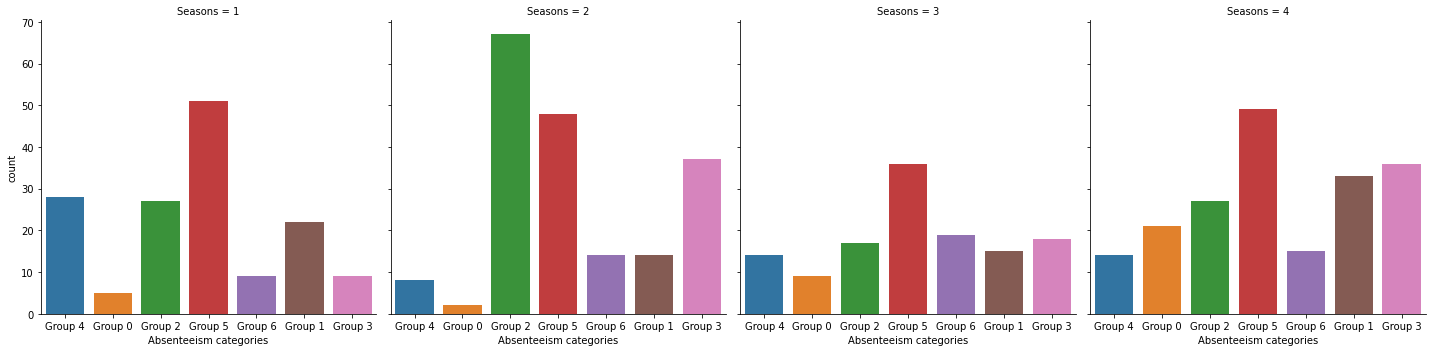

In [ ]:
# Absenteeism categories w.r.t seasons
plt.figure(figsize = (10,5))
#fig, axes = plt.subplots(2,2)
sns.catplot(x ='Absenteeism categories',kind = 'count',col = "Seasons",data = mydata_cat)

season_abs_groups = mydata_con.groupby(['Seasons'],as_index = False).agg({'Absenteeism time in hours': "sum"})
print(season_abs_groups)

<Figure size 1440x360 with 0 Axes>

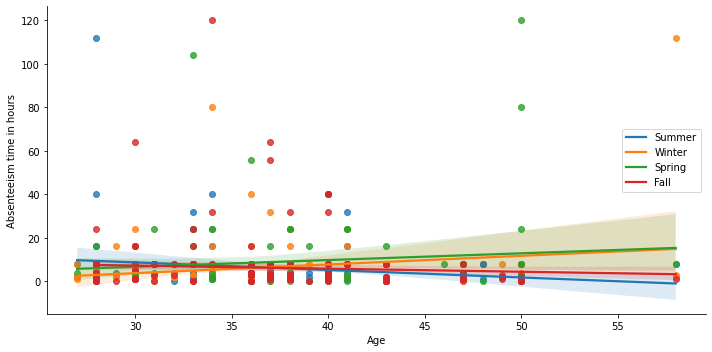

In [ ]:
# study of age and seasons on Absenteeism
plt.figure(figsize = (20,5))
sns.lmplot(x = 'Age',y = 'Absenteeism time in hours',data = mydata_con,hue = 'Seasons',size=5,aspect=2,legend=False)
plt.legend(['Summer','Winter','Spring','Fall'])

Text(0.5, 1.0, 'Mean absentism in different months')

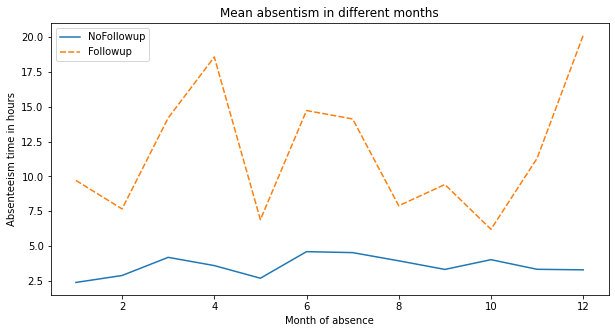

In [ ]:
# line graph for  mean of Absenteeism in hours in different months
plt.figure(figsize=(10,5))
mean_abs_per_month = mydata_con.groupby(['Month of absence','followUp_req'],as_index = False).agg({'Absenteeism time in hours': "mean"})
#print(mean_abs_per_month)
sns.lineplot('Month of absence','Absenteeism time in hours',hue = 'followUp_req',style = 'followUp_req',data = mean_abs_per_month)

plt.legend(['NoFollowup','Followup'])
plt.title("Mean absentism in different months")

In [ ]:
# absenteeism hours
mydata_con.groupby(['Reason for absence']).agg({"Absenteeism time in hours":"sum"})


,Absenteeism time in hours
Reason for absence,
0,0
1,182
2,24
3,8
4,9
5,16
6,40
7,134
8,27


Text(0.5, 1.0, 'Absenteeism on each workingday')

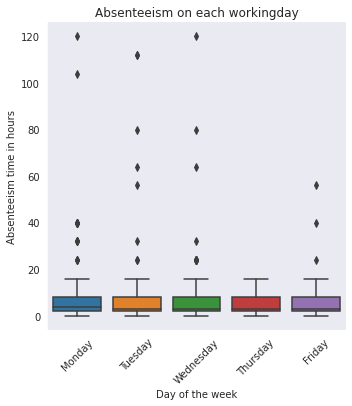

In [ ]:
# boxplot for weekdays
sns.set_style(style='dark')
j = sns.factorplot("Day of the week", "Absenteeism time in hours", data=mydata_con, kind="box")
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
j.set_xticklabels(labels,rotation = 45)
plt.title('Absenteeism on each workingday')

Text(0.5, 1.0, 'Absenteeism time for various reasons')

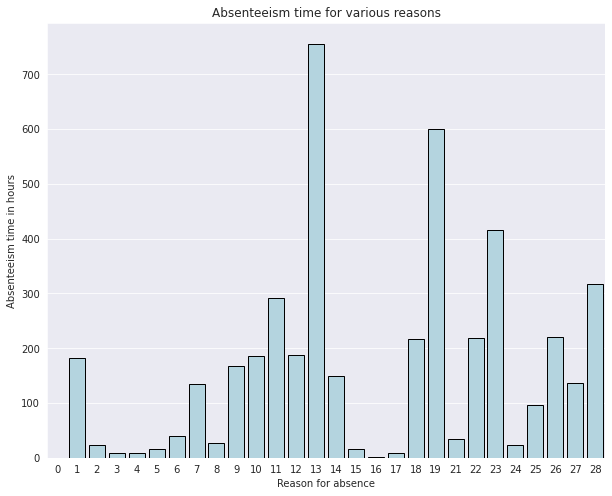

In [ ]:
#Absenteeism hours for different reasons
plt.figure(figsize=(10,8))
sns.set_style(style = "darkgrid")
count_absents = pd.DataFrame(mydata_con.groupby('Reason for absence',as_index = False).agg({'Absenteeism time in hours':'sum'}))
count_absents.sort_values('Absenteeism time in hours',ascending = True,inplace = True)
#print(count_absents)

#plot  the graph
sns.barplot('Reason for absence','Absenteeism time in hours',data = count_absents, color = 'lightblue',edgecolor='black')
plt.title("Absenteeism time for various reasons")


In [ ]:
# store the training dataset in a local variable
dataset_categorical =mydata_cat
dataset_continuous = mydata_con

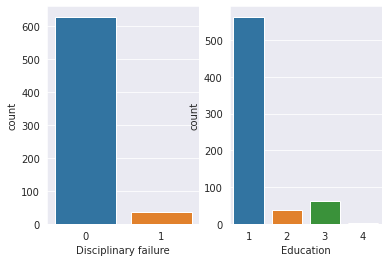

In [ ]:
# categorical variables
plt.figure(2)
plt.subplot(121)
sns.countplot(dataset_categorical['Disciplinary failure'])

plt.subplot(122)
sns.countplot(dataset_categorical['Education'])

Text(0, 0.5, 'Sum of Absenteeism time in hours')

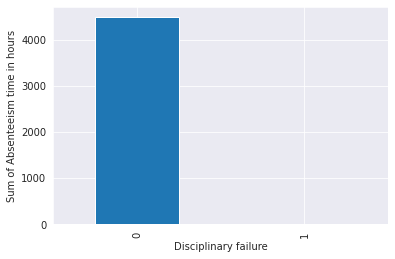

In [ ]:
# plot between dependent and independent variable

subset = dataset_continuous.groupby('Disciplinary failure')['Absenteeism time in hours'].sum()

fig = plt.figure()

ax = fig.add_subplot(111)
subset.plot(kind='bar')

ax.set_ylabel('Sum of Absenteeism time in hours')

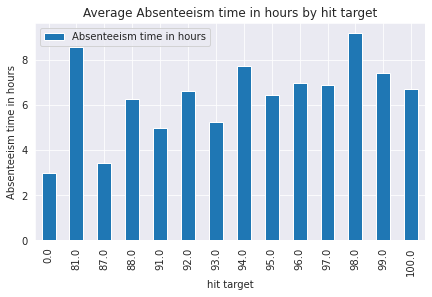

In [ ]:
hit = dataset_continuous.groupby('Hit target')[['Absenteeism time in hours']].mean()
ax = hit.plot(kind='bar', figsize=(7,4), legend=True)
ax.set_xlabel('hit target')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by hit target')
plt.show()

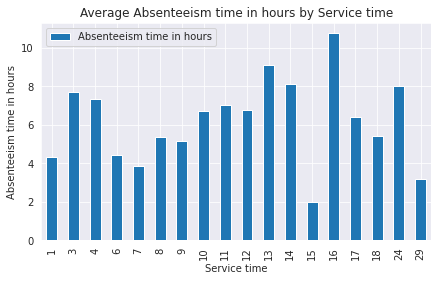

In [ ]:
data_ser = dataset_continuous.groupby('Service time')[['Absenteeism time in hours']].mean()
ax = data_ser.plot(kind='bar', figsize=(7,4), legend=True)
ax.set_xlabel('Service time')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by Service time')
plt.show()

In [ ]:
#Consider necessary columns only
# Drop duplicates
df1 = mydata_con
df1 = df1[['ID', 'Reason for absence', 'Month of absence', 
           'Social drinker', 'Social smoker', 'Pet', 'Weight',
           'Height', 'Body mass index', 'Absenteeism time in hours',
          'followUp_req']]
df1.drop_duplicates()
df1.head()


,ID,Reason for absence,Month of absence,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,followUp_req
0,11,26,7,1,0,1,90.0,172,30,4,0
1,36,0,7,1,0,0,98.0,178,31,0,1
2,3,23,7,1,0,0,89.0,170,31,2,0
3,7,7,7,1,1,0,68.0,168,24,4,1
4,11,23,7,1,0,1,90.0,172,30,2,0


In [ ]:
# Aggregate absenteeism hours by grouping by ID, irrpespective or Reason/Month
df2 = df1.groupby(['ID', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'],
                   as_index = False).agg({'Absenteeism time in hours': "sum"})
df2.head(10)

,ID,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,0,0,1,88.0,172,29,109
1,2,0,1,5,88.0,163,33,25
2,3,1,0,0,89.0,170,31,479
3,5,1,0,0,106.0,167,38,92
4,6,0,0,2,69.0,167,25,56
5,7,1,1,0,68.0,168,24,30
6,8,1,0,2,100.0,170,35,0
7,9,0,0,1,65.0,172,22,134
8,10,1,0,4,80.0,172,27,170
9,11,1,0,1,90.0,172,30,442


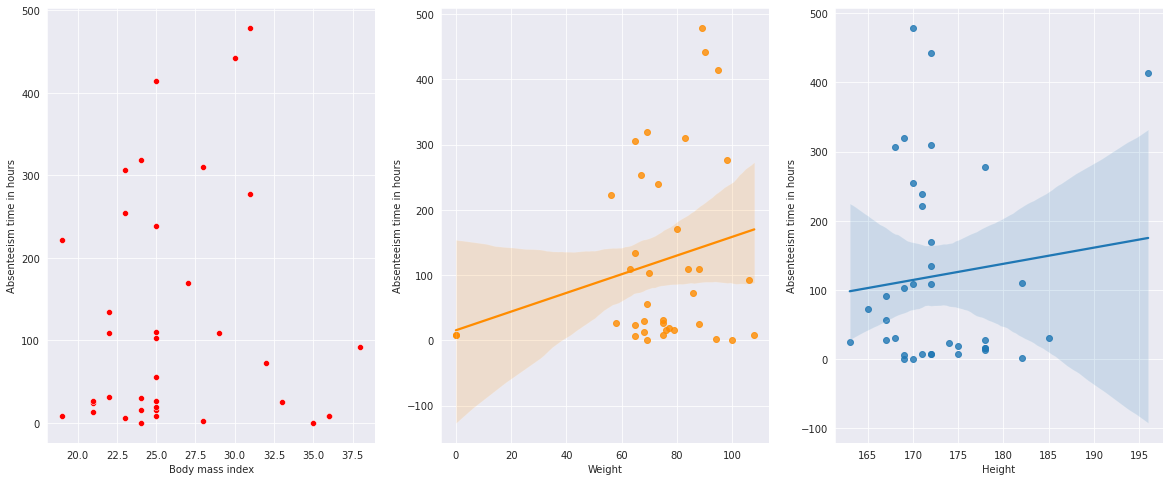

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20, 8)
sns.regplot('Weight', 'Absenteeism time in hours', color = 'darkorange', data=df2, ax=ax[1] )
sns.regplot('Height', 'Absenteeism time in hours', data=df2, ax=ax[2])
sns.scatterplot('Body mass index', 'Absenteeism time in hours', color='red', data=df2, ax=ax[0])



In [ ]:
#Random Forest Algorithm.

In [ ]:
random_state_split = 121 
#function to split data
def split_data(X,Y):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.05,random_state = random_state_split)
    return(x_train,x_test,y_train,y_test)

In [ ]:
# function for modelling
def model_fit(x,y,randomforest):
    model_rf = randomforest.fit(x,y)
    return model_rf

In [ ]:
# function for model evaluation
def model_eval(fit,x,y):
    # predict on test data
    y_pre = fit.predict(x)

    # evaluate the model
    acc = accuracy_score(y_pre,y)
    print("Accuracy of validation test set:{}%".format(round(acc*100,2)))

In [ ]:
#  define the response and target varaibles
features = mydata_cat.drop(['Absenteeism categories'],axis = 1)
target = mydata_cat['Absenteeism categories']
target.value_counts()

Group 5    184
Group 2    138
Group 3    100
Group 1     84
Group 4     64
Group 6     57
Group 0     37
Name: Absenteeism categories, dtype: int64

In [ ]:
# split the data
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.2,random_state = 121)

# train model
randomforest = RandomForestClassifier(random_state = 100)
model = model_fit(x_train, y_train,randomforest) 

# check accuracy
print(model)
y_predict = model.predict(x_train)
print("Accuracy of training set:{}%".format(round(accuracy_score(y_predict,y_train)*100,2)))
y_predict = model_eval(model,x_test,y_test)

RandomForestClassifier(random_state=100)
Accuracy of training set:96.23%
Accuracy of validation test set:47.37%
